# Sample of my work  based on the  Kaggle Titanic dataset

Here is a sample of my work, performed on the publicly available dataset at : https://www.kaggle.com/c/titanic

I have conducted the following.

#### 1. An Exploratory Data Analysis (EDA)
#### 2. Predictive Modeling including
- Feature Engineering
-  Handling missing features
- Handling the class imbalance
-  A comparison of two classification algorithms, evaluated on a separate hold out set that was not used when training the models, with each model's parameters tuned using a grid search

### Description of the data
 Repeated from 
 https://www.kaggle.com/c/titanic for easy reference.
 
##### VariableDefinitionKey
- survival Survival 0 = No, 1 = Yes 
- pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
- sex Sex 
- Age Age in years 
- sibsp # of siblings / spouses aboard the Titanic 
- parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare 
- cabin - Cabin number 
- embarked Port of Embarkation , Q = Queenstown, S = Southampton

##### Variable Notes 
- pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.
    
### Libraries
- Python3 libraries required to run this note book are in the file: `python3-requirements.txt`
- These can be installed in one go using:   `pip install -r python3-requirements.txt`

---

# Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline


# Load the data 

In [2]:
#Read training data
train = pd.read_csv('./data/train.csv')
train = train.set_index('PassengerId')
display(train.sample(6))
train.shape
# train.info()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q
83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q


(891, 11)

In [3]:
#Read test data
test = pd.read_csv('./data/test.csv')
test = test.set_index('PassengerId')
display(test.sample(6))
test.shape

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1184,3,"Nasr, Mr. Mustafa",male,NaN,0,0,2652,7.2292,NaN,C
1209,2,"Rogers, Mr. Reginald Harry",male,19.0,0,0,28004,10.5000,NaN,S
1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
1131,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.4250,C86,C
1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S
1291,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q


(418, 10)

We see a mix of categorical and numerical variables. 'Age' and 'Cabin' columns seem to have missing values (NaN)

---

# Exploratory Data Analysis

In [4]:
# Explore basic statistics
def make_datadict(train):
    # identify datatypes of the 11 columns, add the stats to the datadict
    datadict = pd.DataFrame(train.dtypes)

    # identify missing values of the 11 columns,add the stats to the datadict
    datadict['MissingVal'] = train.isnull().sum()

    # Identify number of unique values, For object nunique will the number of levels
    # Add the stats the data dict
    datadict['NUnique']=train.nunique()

    # Identify the count for each variable, add the stats to datadict
    datadict['Count']=train.count()

    # rename the 0 column
    datadict = datadict.rename(columns={0:'DataType'})
    return datadict

display(make_datadict(train))

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [5]:
# See categorical variable suymmary
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jacobsohn, Mr. Sidney Samuel",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


- Cabin has a lot of missing values (only 204 out of 891 rows)
- Embarked has a few missing values

In [6]:
# See numerical variable suymmary
train.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Age has a few missing values that could be imputed

In [7]:
# Target classes
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

- Only aroudn 40 percent survived. Slightly unbalanced targets for a binary classification.

## Analysis of the data

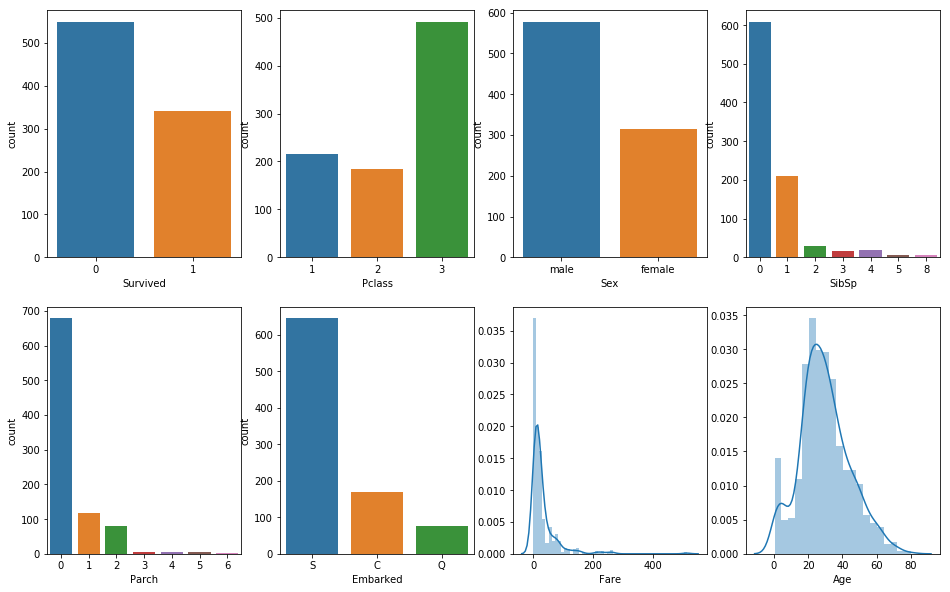

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=train,ax=axes[0,0])
sns.countplot('Pclass',data=train,ax=axes[0,1])
sns.countplot('Sex',data=train,ax=axes[0,2])
sns.countplot('SibSp',data=train,ax=axes[0,3])
sns.countplot('Parch',data=train,ax=axes[1,0])
sns.countplot('Embarked',data=train,ax=axes[1,1])
sns.distplot(train['Fare'], kde=True,ax=axes[1,2])
sns.distplot(train['Age'].dropna(),kde=True,ax=axes[1,3])

## Insights at a glance
- Morthe e than 50% of  passengers did not survive (60% from cell [7])
- Most passengers were 3rd class
- Most passengers were male (almost twice the number of female passengers)
- Most passengers had no siblings or spouses onboard
- Most passengers had no parents or children onboard
- Most passengers embarked from S = Southampton
- Most passengers paid the smallest fare
- Most passengers were in the 20-40 year age group (mostly late 20s based on the histogram)

## Analysis of data for Survived passengers (target variable)

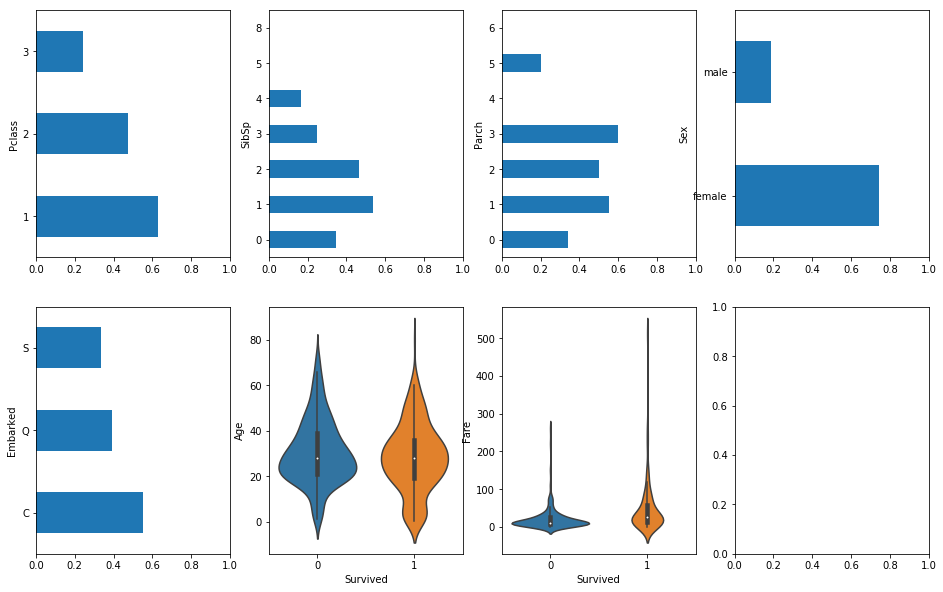

In [9]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.violinplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.violinplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2])

## Insights at a glance
- Most survivors were 1st class (around 60%)
- Most survivors had 1 sibling/spouse (more than 50%)
- Most survivors had 3 parents/children (around 60%)
- Most survivors were female (more than 70%) - gender is a strong influencer of survival
- Most survivors embarked from 'C' (more than 50%)
- The Median age of suvivers and non-survivers was around 30 years, but surviers have a slightly large amount of younger passengers (lower bulge for survivers)
- Most of the non-survivors paid a lower fair. The survivors have more high fare passengers.

#### Joint distribution of the two continuos variables (Age and Fare)


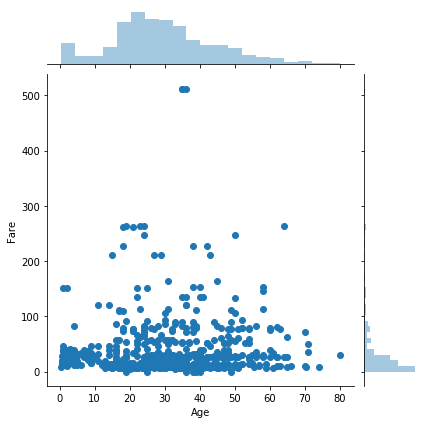

In [10]:
#All passengers
sns.jointplot(x="Age", y="Fare", data=train);

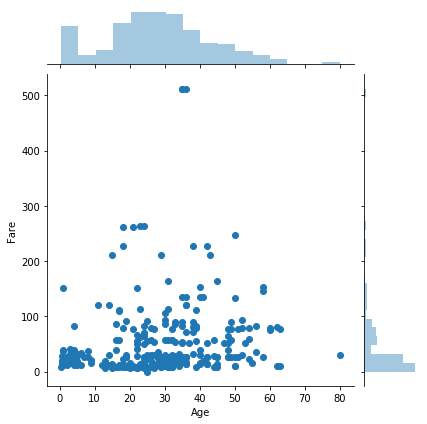

In [11]:
# Survivors
sns.jointplot(x="Age", y="Fare", data=train[train.Survived == 1]);


- Most of the survivors were in the 20-40 age group and paid a fair of less than \$50 (plot above)
- Compared to the joint plot for all passengers (plot above), for the survivors (below plot), there are more passengers that paid a higher pare (compare the  histograms  on the right side.)
- Simillarly there are more very young passengers when we consider only the passengers that survived( Compare the Age histogram at the top of both the plots).
- We can conclude that very young passengers and passengers that paid a highier fare were more likely to survive.


### Correlation Analysis

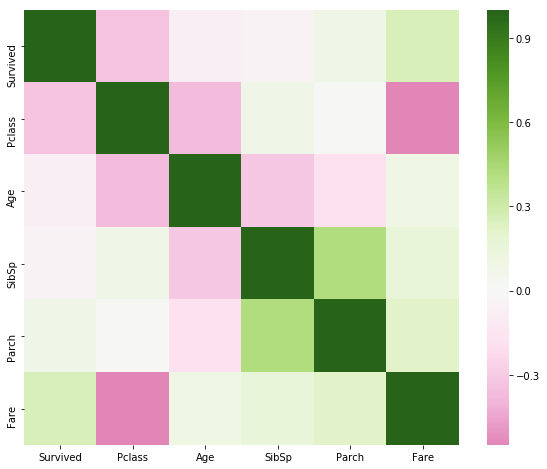

In [12]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            square=True, cmap="PiYG", center=0, ax=ax)

- Fare is positively correlated to survival
- Parch has a weak positive correlation to survival
- Age has a weak negative correlation to survival
- Passenger class has a stronger  negative correlation to survival

---

# Predictive Modelling using Machine Learning

## Feature Engineering 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S,Mr.
286,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C,Mr.
337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S,Mr.
837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S,Mr.


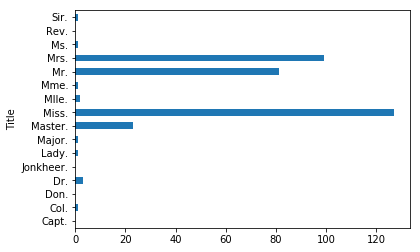

In [13]:
# Capture Title from the name
train['Title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
display(train.sample(5))
train.groupby('Title')['Survived'].sum().plot(kind='barh')

- Titles confirm that most survivors were female (Miss and Mrs)

### Fix missing values

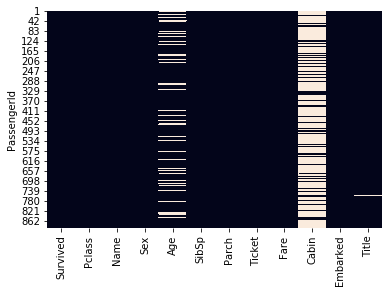

In [14]:
# Visualize missing values
sns.heatmap(train.isna(), cbar=False)


In [15]:
display(make_datadict(train))

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


#### Cabin
More than half of this column is missing so we will drop that column

In [16]:
train = train.drop(columns = ['Cabin'])

#### Age
- Only about 25% of the Age column is missing. Lets impute it by the median Age

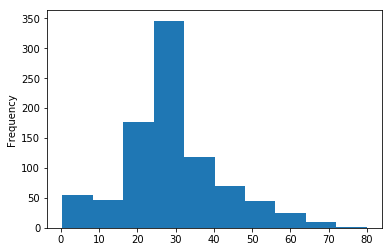

In [17]:

train.Age.fillna(train.Age.median(),inplace=True)
train.Age.plot(kind='hist')

#### Title

In [18]:
train[train.Title.isna()]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,S,NaN


In [19]:
train.Title.fillna('Countess.',inplace=True) # This only works because 760 is the only row with NaN Title :)
train.loc[760]


Survived                                                    1
Pclass                                                      1
Name        Rothes, the Countess. of (Lucy Noel Martha Dye...
Sex                                                    female
Age                                                        33
SibSp                                                       0
Parch                                                       0
Ticket                                                 110152
Fare                                                     86.5
Embarked                                                    S
Title                                               Countess.
Name: 760, dtype: object

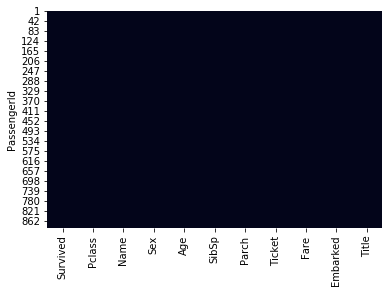

In [20]:
sns.heatmap(train.isna(), cbar=False)


#### Fare

In [21]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
sum(train.Fare == 0)

15

These 15 passengers had a fare of zero!

In [23]:
train[train.Fare == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S,Mr.
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S,Mr.
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S,Mr.
278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,S,Mr.
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S,Mr.
414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,S,Mr.
467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,S,Mr.
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,S,Mr.
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S,Mr.


- They were all male passengers embarking from  Southampton. Perhaps they were indeed on a free ticket such as some form of a promotion? 
- It would be interesting to find out more about these passengers. Without further information, lets leave their fare at 0.

#### Title

In [24]:
train.Title.describe()

count     891
unique     17
top       Mr.
freq      517
Name: Title, dtype: object

In [25]:
train.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [26]:
display(make_datadict(train))

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,0,88,891
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Embarked,object,2,3,889


#### Embarked

In [27]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [29]:
# Lets impute the missing values with the most common one - 'S'
train.Embarked.fillna('S', inplace=True)

In [30]:
display(make_datadict(train))

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,0,88,891
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Embarked,object,0,3,891


- We don't have any more missing values

#### New feature 'FamilyCount'

In [31]:
train['FamilyCount']=train.SibSp+train.Parch
# display(make_datadict(train))
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyCount
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,0


#### New feature 'NameLength'


In [32]:
train['NameLength']=[len(x) for x in train.Name]
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyCount,NameLength
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,1,23
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,1,51
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,0,22


#### New feature 'TicketLength'


In [33]:
train['TicketLength']=[len(x) for x in train.Ticket]
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyCount,NameLength,TicketLength
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,1,23,9
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,1,51,8
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,0,22,16


#### New feature 'TitleLength'


In [34]:
train['TitleLength']=[len(x) for x in train.Title]
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyCount,NameLength,TicketLength,TitleLength
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,1,23,9,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,1,51,8,4
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,0,22,16,5


#### Drop remaining missing values

In [35]:
# Drop any missing values left at this point 
trainML = train.dropna()
# sns.heatmap(trainML.isna(), cbar=False)
display(trainML.sample(3))
display(trainML.shape)
display(make_datadict(trainML))


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyCount,NameLength,TicketLength,TitleLength
PassengerId,,,,,,,,,,,,,,,
479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,S,Mr.,0,25,6,3
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,S,Mr.,0,34,17,3
849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,S,Rev.,1,17,6,4


(891, 15)

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,0,88,891
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Embarked,object,0,3,891


### Hot encode categorical features
- Categorical features such as Sex, Embarked need to be converter to numeric by one-of-K hot encoding (dummy variables)


#### Hot encode Sex
Sex seems to have a strong correlation to survival so it is important to have this feature

In [36]:
trainML['SexFemale'] = [1 if x == 'female' else 0 for x in trainML.Sex]
trainML.sample(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyCount,NameLength,TicketLength,TitleLength,SexFemale
PassengerId,,,,,,,,,,,,,,,,
448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.550,S,Mr.,0,27,6,3,0
865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.000,S,Mr.,0,22,6,3,0
543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,S,Miss.,6,33,6,5,1


#### Hot encode Embarked

In [37]:
trainML.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [38]:
trainML['EmbarkedS'] = [1 if x == 'S' else 0 for x in trainML.Embarked]
trainML['EmbarkedC'] = [1 if x == 'C' else 0 for x in trainML.Embarked]
trainML['EmbarkedQ'] = [1 if x == 'Q' else 0 for x in trainML.Embarked]
trainML.sample(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyCount,NameLength,TicketLength,TitleLength,SexFemale,EmbarkedS,EmbarkedC,EmbarkedQ
PassengerId,,,,,,,,,,,,,,,,,,,
663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,S,Mr.,0,26,4,3,0,1,0,0
706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,S,Mr.,0,46,6,3,0,1,0,0
620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,S,Mr.,0,19,5,3,0,1,0,0


In [39]:
display(make_datadict(trainML))

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,0,88,891
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Embarked,object,0,3,891


- Categorical variables Name, Ticket and Title have too many unique values to hot encode. We will use their lengths as fatures


In [40]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',  
             'FamilyCount','NameLength', 'TicketLength', 'TitleLength',
             'EmbarkedS', 'EmbarkedC', 'EmbarkedQ',
             'SexFemale']
# features = ['Pclass', 'Age', 'Fare', 'EmbarkedC', 'EmbarkedQ',
#              'SexFemale']
X = trainML[features].values
y = trainML['Survived'].values
display(X.shape)
display(y.shape)
X[0:3,:]

(891, 13)

(891,)

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    , 23.    ,
         9.    ,  3.    ,  1.    ,  0.    ,  0.    ,  0.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    , 51.    ,
         8.    ,  4.    ,  0.    ,  1.    ,  0.    ,  1.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    , 22.    ,
        16.    ,  5.    ,  1.    ,  0.    ,  0.    ,  1.    ]])

### Create test and train sets

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)
display(X_train.shape)
display(X_test.shape)

(712, 13)

(179, 13)

### Address the class imbalancs

In [42]:
np.mean(y_train)

0.37640449438202245

- We only have aroudn 40% samples of survivors in the training set (i.e class 1 is less represented than class 0)
- This will bias most  estimators to predict more of the majority class (class 0 , non-survivors)
- The class imbalance can be addressed by sampling methods such as SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
display(X_train_res.shape)
display(y_train_res.shape)
print("Percentage of survivals in resampled training set: {}".format(y_train_res.mean()))

(888, 13)

(888,)

Percentage of survivals in resampled training set: 0.5


## Decision Tree Classifier
- Perform a grid search to tune the best parameters for a decision tree classifier

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


parameters = {'max_depth':[2, 4, 8, 16], 
              'criterion':('gini', 'entropy')}

clf = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                   parameters, 
                   cv=6)

# Train
clf.fit(X_train_res, y_train_res)

# Show nest estimator parameters
print("Best estimator parameters: {}".format(clf.best_params_))

# Evaluate on training set
y_predict_train = clf.predict(X_train_res)
print("Accuracy on training set: {}".format((y_train_res == y_predict_train).mean()))

# Evaluate on testing set
y_predict = clf.predict(X_test)
print("Accuracy on training set: {}".format((y_test == y_predict).mean()))


Best estimator parameters: {'criterion': 'entropy', 'max_depth': 4}
Accuracy on training set: 0.8671171171171171
Accuracy on training set: 0.8324022346368715


- 83% accuracy on the unseen test is quite good performance
- Given that the model generalizes  well - as there is not a big drop in performance from training to test set (87% to 83%)



#### Feature importance

In [45]:
# See the top most important features 
pd.DataFrame({'feature': features, 
              'Importance': clf.best_estimator_.feature_importances_}).sort_values('Importance', ascending=False).head(6)

,Importance,feature
12,0.568177,SexFemale
0,0.143556,Pclass
1,0.104283,Age
4,0.095428,Fare
7,0.049569,TicketLength
6,0.028319,NameLength


- This agrees with what we saw in the EDA where the SexFemale, SexFemale, Age and  Fare  were well correlated to survival
- The the number of charcters in the Ticket number is probably related to the Passenger Class

#### Visualize the Decision Tree Classifier
- Let's see what the actual decision tree looks like
- *Note:* `graphviz` needs to be installed in the system (e.g. `apt-get install graphviz`)


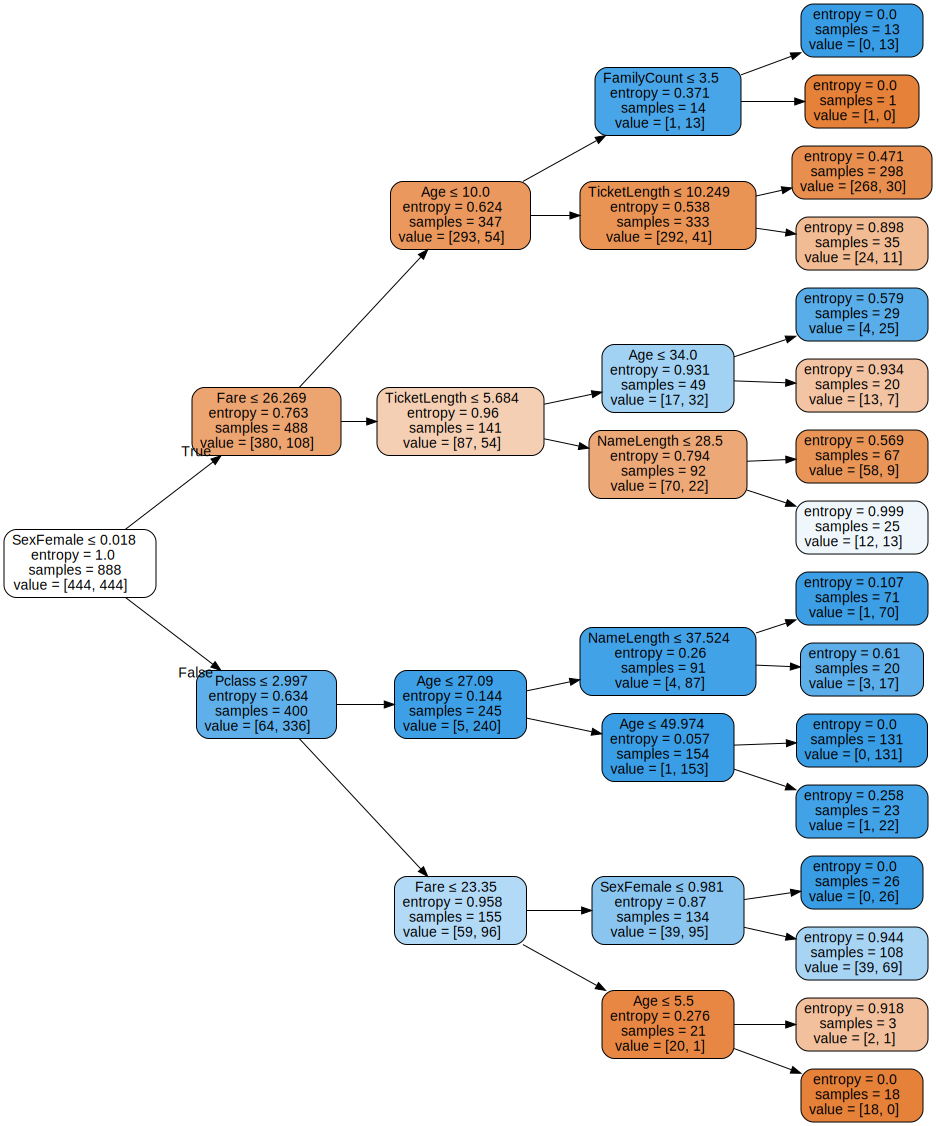

In [46]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf.best_estimator_, out_file=None,
                                filled=True, rounded=True,  
                                special_characters=True, rotate=True, 
                                feature_names=features)  
graph = graphviz.Source(dot_data)  
graph 

- The tree could probably be pruned further for better performance

## Random Forest Classifier
- Perform a grid search to tune the best parameters for a Random Forest Classifier
- In essence, a Random Forest Classifier uses the consensus of several decision trees 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_depth':[2, 4, 8, 12, 16], 
              'min_samples_leaf': [10, 20],
              'criterion':('gini', 'entropy')}

clfRF = GridSearchCV(RandomForestClassifier(n_estimators=50,
                                          random_state=42), 
                   parameters, 
                   cv=6)

# Train
clfRF.fit(X_train_res, y_train_res)

# Show nest estimator parameters
print("Best estimator parameters: {}".format(clfRF.best_params_))

# Evaluate on training set
y_predict_train = clfRF.predict(X_train_res)
print("Accuracy on training set: {}".format((y_train_res == y_predict_train).mean()))

# Evaluate on testing set
y_predict = clfRF.predict(X_test)
print("Accuracy on training set: {}".format((y_test == y_predict).mean()))

Best estimator parameters: {'min_samples_leaf': 10, 'criterion': 'gini', 'max_depth': 12}
Accuracy on training set: 0.8716216216216216
Accuracy on training set: 0.8268156424581006


- I actually got a 98% accuracy on the training when the 'min_samples_leaf' was not tuned, but with a test set accuracy of ~80%, indicating strong overfitting which is not good.
- The overfitting was reduced by regularizing with the  'min_samples_leaf' as shown above with a training set accuracy of 87% and test set accuracy of 83%
- This RF classicier is not significantly better (if not worse) than the Decision Tree Classifier in cell [60].
- At this point, we might as well stick with the  Decisition Tree Classifier which is a simpler model (and is also more interpretable)

# Ideas for more features
- Alphabetical standing of lastname (a-f, f-m, o-z  etc)